# Lab 7.04 - Time series analysis

In [25]:
# Package imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.api import Holt

### Exercise 4 - Airline ticket data

Consider the airline ticket data in the file airline ticket data.csv

- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Create and train the model. Predict the values for the next 12 months.
- Create a plot with the airline ticket data, the fitted values and the predicted values for the next 12 months.

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
df.head()

C:\Users\jonah\AppData\Local\Temp\ipykernel_91428\1634336677.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Tickets
Month,
2018-01-01,605
2018-02-01,647
2018-03-01,636
2018-04-01,612
2018-05-01,714


<Axes: xlabel='Month'>

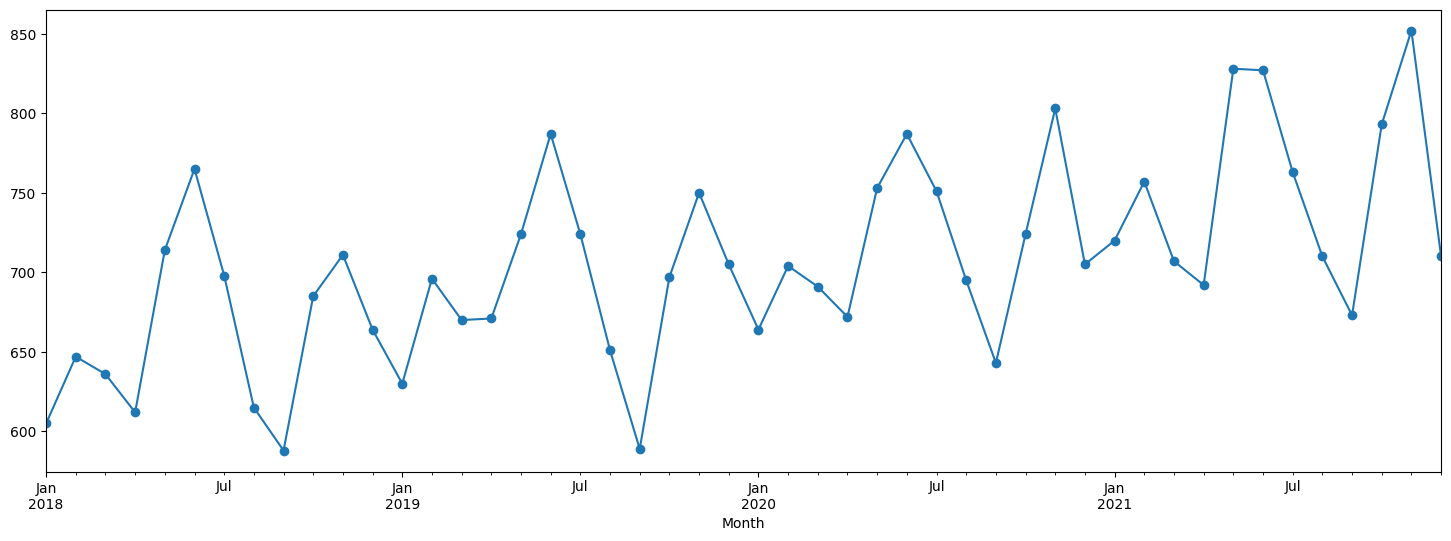

In [15]:
pd.Series(data=df['Tickets'], index=df.index).plot(marker='o', figsize=[18,6])

c:\Users\jonah\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

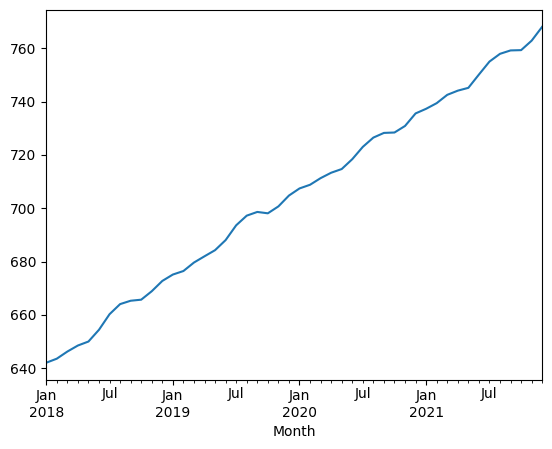

In [ ]:
smooth = ExponentialSmoothing(df['Tickets'], trend='add', initialization_method="estimated").fit()

df['dub'] = smooth.fittedvalues
smooth.fittedvalues.plot()

In [54]:
data_des = Holt(df['Tickets']).fit(
    smoothing_level=.3,
    smoothing_trend=.2,
    optimized=False)

df['DES'] = data_des.level
df.tail()

c:\Users\jonah\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Tickets,DES,dub
Month,,,
2021-08-01,710,764.525711,757.915803
2021-09-01,673,739.238264,759.188941
2021-10-01,793,753.562755,759.298258
2021-11-01,852,783.656134,762.860381
2021-12-01,710,766.222131,768.079134


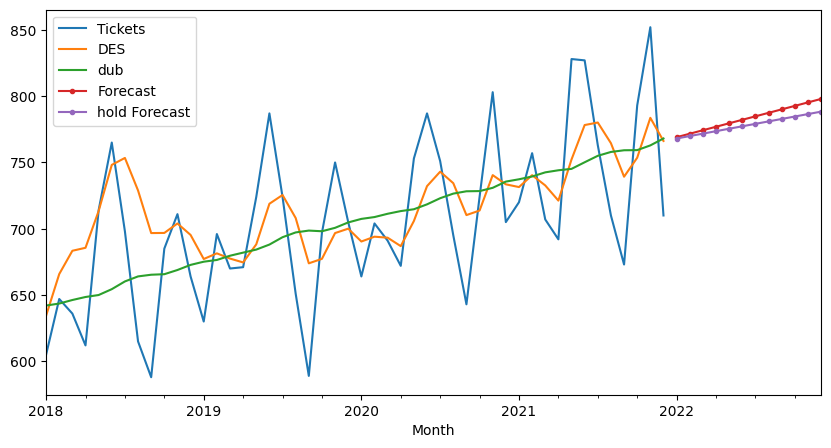

In [55]:
df.plot(y=['Tickets',  'DES', 'dub'], figsize=[10,5]);
data_ses_fcast = smooth.forecast(12)
data_hold_fcast = data_des.forecast(12)
data_ses_fcast.plot(marker='.', legend=True, label='Forecast');
data_hold_fcast.plot(marker='.', legend=True, label='hold Forecast');

## Source
Business Analytics Data Analysis & Decision Making 